In [1]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    
    for d in data:
        if "data_kind" in d:
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            nq = int(extract_val(d, "num_queries"))
            wk = extract_val(d, "workload")
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-3])
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
            retdata["num_queries"].append(nq)
            retdata["workload"].append(wk)
            
    df = pd.DataFrame(retdata)
    return df

In [4]:
LOGDIR = "../results3/"

In [5]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

In [6]:
df = pd.concat(dfs)

In [7]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'random_domain', 'true_cols', 'random_domain2', 'test_shuffle', 'test', 'test_shuffle2', 'random_domain3'} {'mi', 'n'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload
0,1445181067565615963714989244604800786123047056644,0.662626,0,test_shuffle,mi,-1,ceb
1,915029170915645337045155848430817461122198949223,0.559800,0,test_shuffle,mi,-1,ceb
2,648840168530145489155498068332217171541974777094,0.361665,0,test_shuffle,mi,-1,ceb
3,939906722582594503280211484844109823221417696432,0.510334,0,test_shuffle,mi,-1,ceb
4,985595977828115300791443894398287667156903744520,0.770000,0,test_shuffle,mi,-1,ceb
...,...,...,...,...,...,...,...
1495,1299624255232658413272312278097928075737231130131,0.788095,2,true_cols,mi,500,ceb
1496,1441157686989587642835357661433565887978093833091,0.625724,2,true_cols,mi,500,ceb
1497,465426741020471148500893870355518756474025481076,0.545633,2,true_cols,mi,500,ceb
1498,589341992287659851723975230383292722010537580742,0.780929,2,true_cols,mi,500,ceb


In [8]:
print(df.keys())

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries',
       'workload'],
      dtype='object')


In [17]:
df = df[df.data_kind != 'random_domain']
df = df[df.data_kind != 'test']
df = df[df.data_kind != 'test_shuffle']
df = df[df.inp_to_eval == 'mi']
df = df[df.num_queries == 500]

In [18]:
print(set(df["num_queries"]))

{500}


In [19]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
random_domain2    1199.635576
test_shuffle2     1200.973597
true_cols         1237.360389
Name: rt, dtype: float64

In [20]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
random_domain2,1500.0,0.799757,0.301890,0.357132,0.802876,1.209203,1.559792,1.766523
test_shuffle2,1500.0,0.800649,0.289292,0.374123,0.803963,1.199163,1.523496,1.672907
true_cols,1500.0,0.824907,0.285874,0.408045,0.831705,1.221393,1.544603,1.700002


In [13]:
tmp = df.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()

In [14]:
edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()

<AxesSubplot:xlabel='test_shuffle2', ylabel='true_cols'>

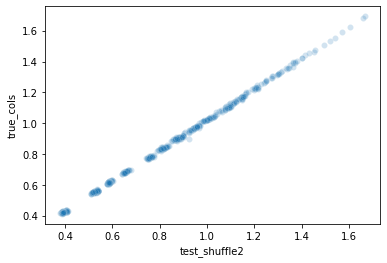

In [15]:
sns.scatterplot(data=edf, x = "test_shuffle2", y="true_cols", alpha=0.2)

<AxesSubplot:xlabel='random_domain2', ylabel='true_cols'>

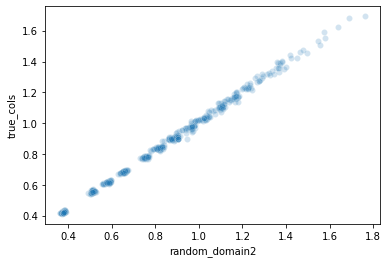

In [16]:
sns.scatterplot(data=edf, x = "random_domain2", y="true_cols", alpha=0.2)